# German Credit Risk Prediction

## Load the Data

The file german.data has no headers. I need to assign column names manually.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define column names based on the documentation
columns = [
    "checking_account_status",
    "duration_month",
    "credit_history",
    "purpose",
    "credit_amount",
    "savings_account",
    "employment_since",
    "installment_rate_income_pct",
    "personal_status_sex",
    "other_debtors",
    "residence_since",
    "property",
    "age",
    "other_installment_plans",
    "housing",
    "existing_credits_at_bank",
    "job",
    "liable_dependents",
    "telephone",
    "foreign_worker",
    "target"
]

# Load the data
df = pd.read_csv('D:/Portfolio/german_credit_risk/data/german.data', sep=' ', header=None, names=columns)

# Map target column: 1 = good, 2 = bad
df['target'] = df['target'].map({1: 'good', 2: 'bad'})

# Quick glance at data
df.head()

,checking_account_status,duration_month,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate_income_pct,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits_at_bank,job,liable_dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,bad


## Sanity Checks / Initial Exploration

In [2]:
# Dimensions of the dataset
print(df.shape)

# Check missing data
print(df.isnull().sum())

# Data types
print(df.dtypes)

# Target distribution
print(df['target'].value_counts(normalize=True))

# Summary of numerical columns
df.describe()

(1000, 21)
checking_account_status        0
duration_month                 0
credit_history                 0
purpose                        0
credit_amount                  0
savings_account                0
employment_since               0
installment_rate_income_pct    0
personal_status_sex            0
other_debtors                  0
residence_since                0
property                       0
age                            0
other_installment_plans        0
housing                        0
existing_credits_at_bank       0
job                            0
liable_dependents              0
telephone                      0
foreign_worker                 0
target                         0
dtype: int64
checking_account_status        object
duration_month                  int64
credit_history                 object
purpose                        object
credit_amount                   int64
savings_account                object
employment_since               object
installment_rate_

,duration_month,credit_amount,installment_rate_income_pct,residence_since,age,existing_credits_at_bank,liable_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


## First Quick Visual Checks

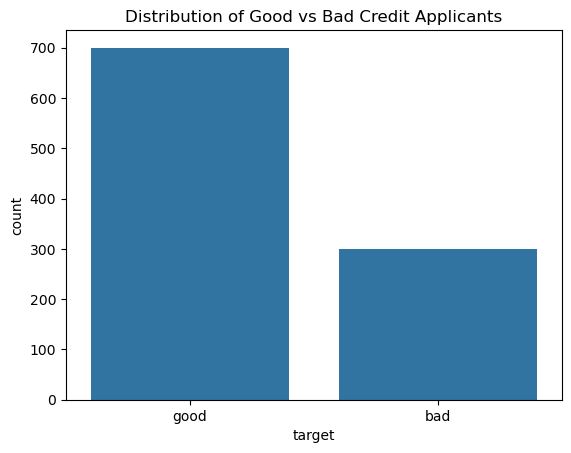

In [3]:
# Good and Bad Credit Applicants distribution
sns.countplot(data=df, x='target')
plt.title('Distribution of Good vs Bad Credit Applicants')
plt.show()

There are 700 good credit applicants and 300 bad credit applicants.

## Clean and Prepare Categorical Features

In [4]:
checking_account_map = {
    'A11': '< 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '>= 200 DM / salary assignment',
    'A14': 'no checking account'
}

credit_history_map = {
    'A30': 'no credits taken/ all credits paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account / other credits existing'
}

purpose_map = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation (does not exist?)',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

savings_account_map = {
    'A61': '< 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '>= 1000 DM',
    'A65': 'unknown / no savings account'
}

employment_since_map = {
    'A71': 'unemployed',
    'A72': '< 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '>= 7 years'
}

personal_status_sex_map = {
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married',
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
}

other_debtors_map = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}

property_map = {
    'A121': 'real estate',
    'A122': 'building society savings/ life insurance',
    'A123': 'car / other (not in savings/bonds)',
    'A124': 'unknown / no property'
}

other_installment_plans_map = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}

housing_map = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}

job_map = {
    'A171': 'unemployed / unskilled non-resident',
    'A172': 'unskilled resident',
    'A173': 'skilled employee / official',
    'A174': 'management / self-employed / highly qualified employee / officer'
}

telephone_map = {
    'A191': 'none',
    'A192': 'yes, registered under the customers name'
}

foreign_worker_map = {
    'A201': 'yes',
    'A202': 'no'
}

In [5]:
df['checking_account_status'] = df['checking_account_status'].map(checking_account_map)
df['credit_history'] = df['credit_history'].map(credit_history_map)
df['purpose'] = df['purpose'].map(purpose_map)
df['savings_account'] = df['savings_account'].map(savings_account_map)
df['employment_since'] = df['employment_since'].map(employment_since_map)
df['personal_status_sex'] = df['personal_status_sex'].map(personal_status_sex_map)
df['other_debtors'] = df['other_debtors'].map(other_debtors_map)
df['property'] = df['property'].map(property_map)
df['other_installment_plans'] = df['other_installment_plans'].map(other_installment_plans_map)
df['housing'] = df['housing'].map(housing_map)
df['job'] = df['job'].map(job_map)
df['telephone'] = df['telephone'].map(telephone_map)
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker_map)


## Exploratory Data Analysis (EDA) Plots

### Categorical Variables vs. Target

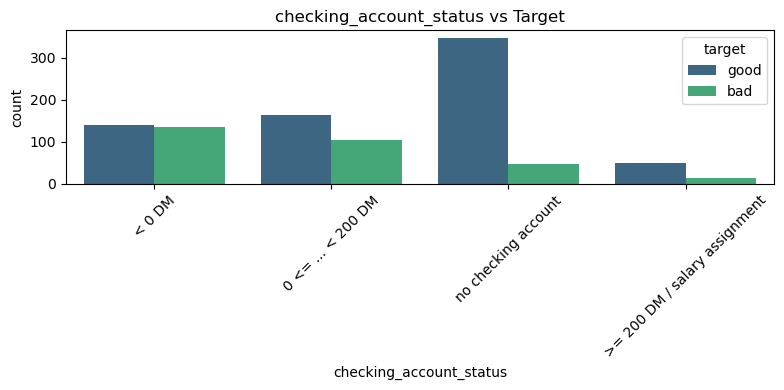

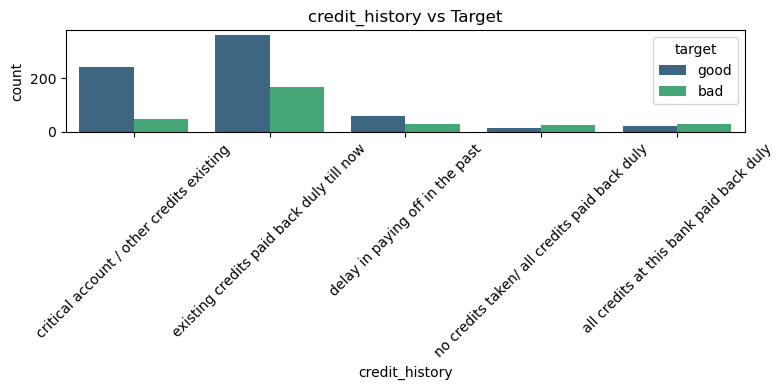

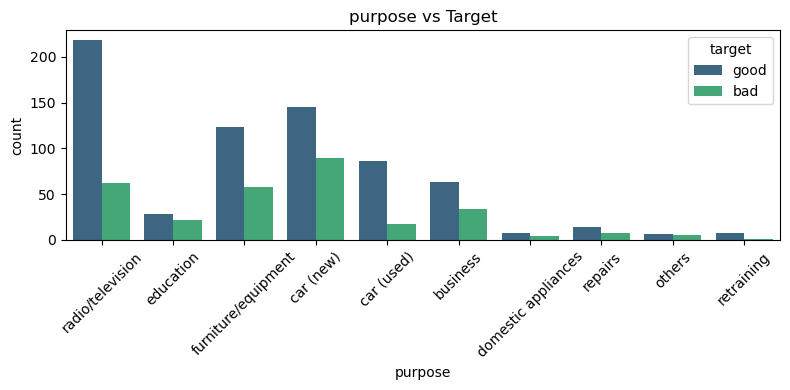

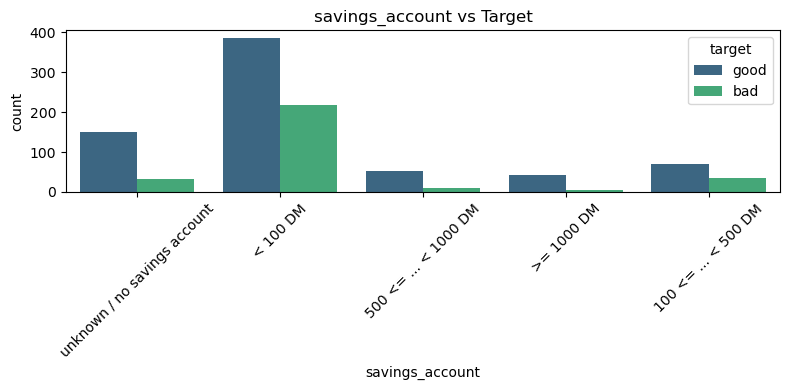

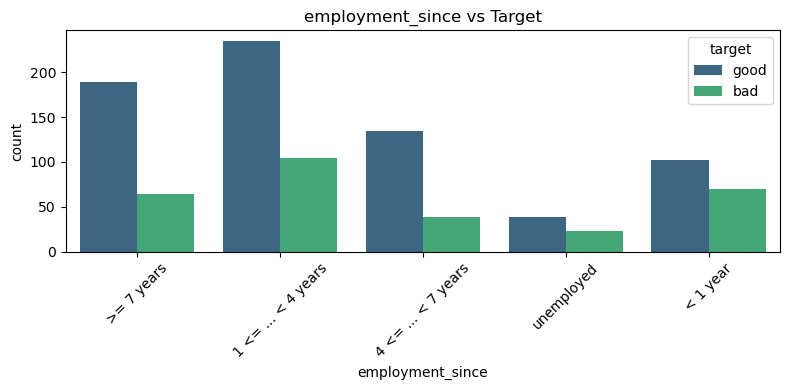

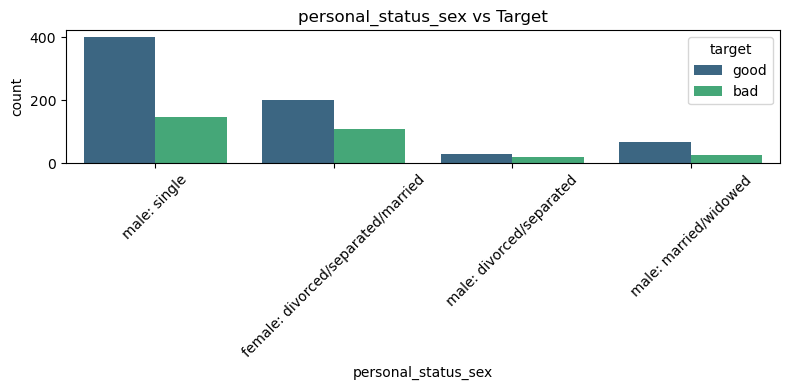

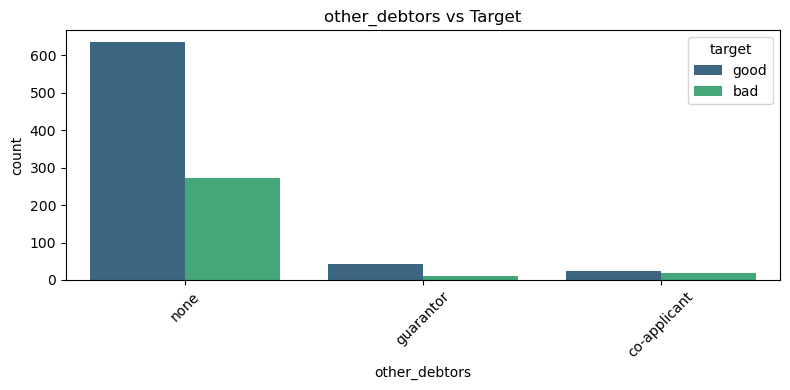

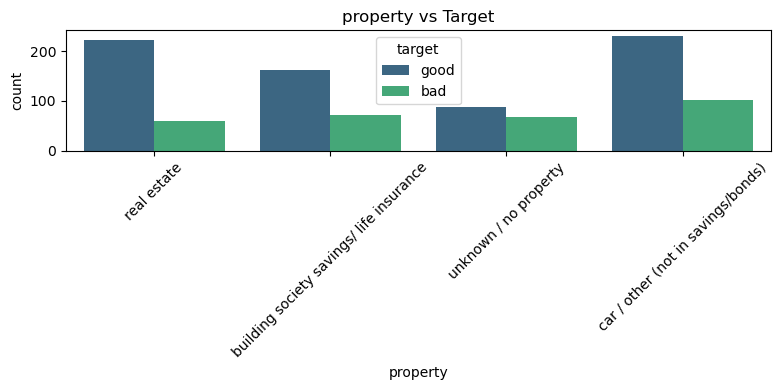

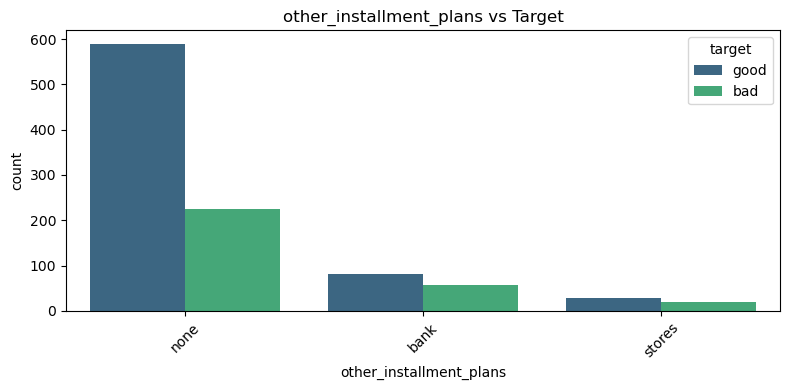

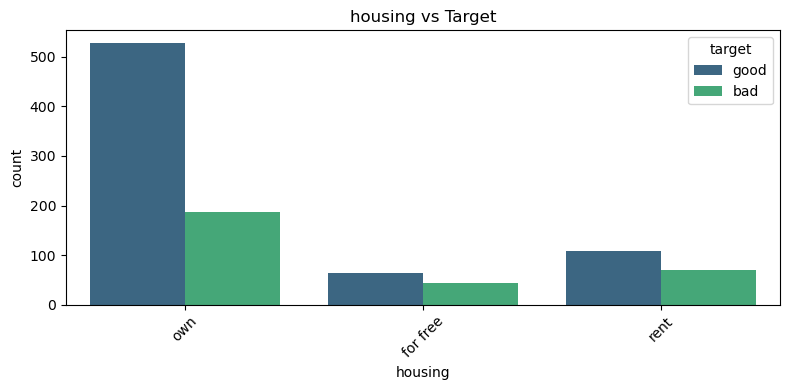

C:\Users\Cheeson Lau\AppData\Local\Temp\ipykernel_23932\2888973359.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


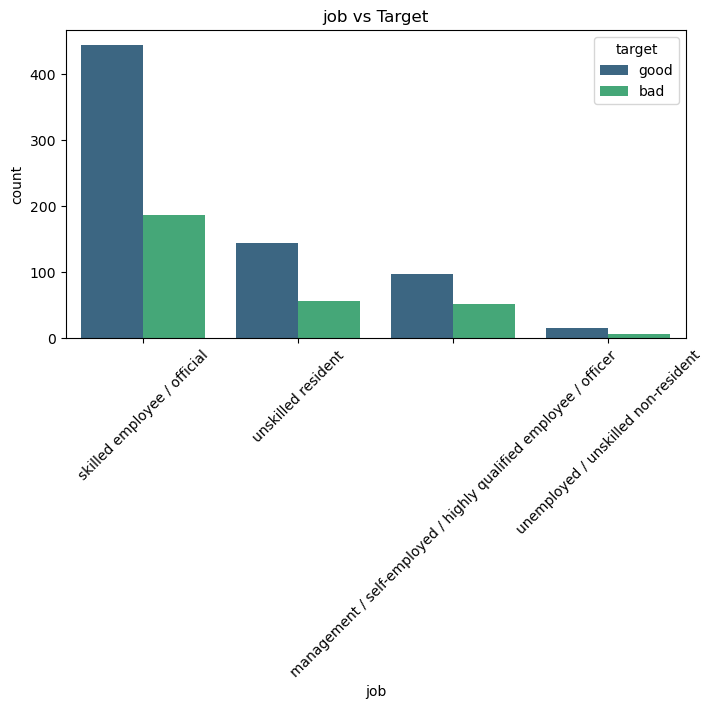

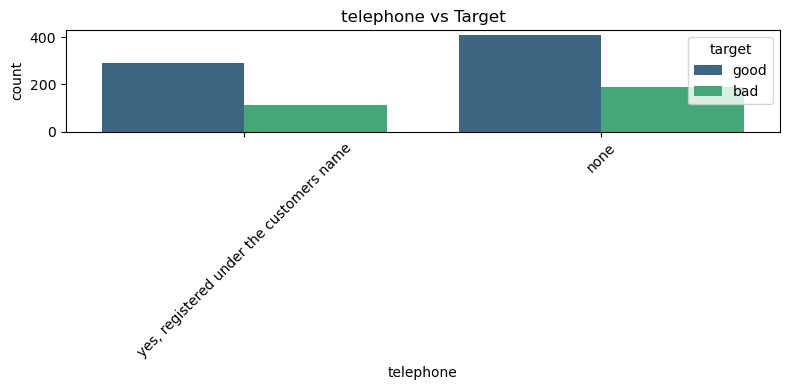

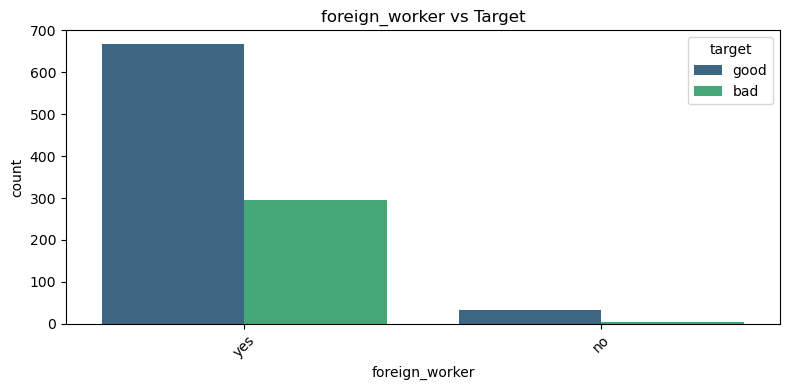

In [6]:
categorical_columns = [
    "checking_account_status",
    "credit_history",
    "purpose",
    "savings_account",
    "employment_since",
    "personal_status_sex",
    "other_debtors",
    "property",
    "other_installment_plans",
    "housing",
    "job",
    "telephone",
    "foreign_worker"
]

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='target', palette='viridis')
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Let's summarize the insights from all the charts I have generated.

Summary of Insights from German Credit Data Categorical Variables vs. Credit Risk (Target)

1. checking_account_status vs. Target

    Key Insight: This is a highly influential feature. Applicants with "no checking account" are overwhelmingly more likely to be good credit risks, suggesting that alternative financial arrangements or self-sufficiency outside traditional banking might be a positive indicator. Conversely, accounts with 0 <= ... < 200 DM and < 0 DM show a more even proportion of bad credit, indicating higher risk for those with low or negative balances.

    DM: Deutsche Mark, former official currency of West Germany and unified Germany until the adoption of Euro in 2002.

2. credit_history vs. Target

    Key Insight: The two largest groups of applicants are those with "critical account / other credits existing" and "existing credits paid back duly till now". For both of these groups, the majority of applicants are classified as good credit risks. This suggests that even with existing credits or critical accounts, a history of (mostly) diligent repayment leads to a higher chance of good credit. Surprisingly, for the categories "no credits taken / all credits paid back duly" and "all credits at this bank paid back duly", the number of bad credit applicants is higher than the number of good credit applicants. These categories also have relatively small counts overall, but this observation contradicts a straightforward interpretation where "paid back duly" would consistently indicate lower risk. This pattern warrants further investigation, potentially exploring the specific context or underlying factors that lead to higher risk in these seemingly positive categories.

3. purpose vs. Target

    Key Insight: The purpose of the credit significantly impacts risk. The purpose of the credit are mostly belonging to "radio/television", "furniture/equipment", and "car (new)". Loans for "radio/television", "furniture/equipment", "car (used)", "retraining tend to have a higher proportion of good credit. However, purposes like "car (new)", "education", "business", "others" appear to carry a relatively higher proportion of bad credit risks.

4. savings_account vs. Target

    Key Insight: The amount in a savings account correlates with credit risk. Applicants with < 100 DM in savings have a notable proportion of bad credit risks. As savings increase (500 <= ... < 1000 DM, >= 1000 DM), the proportion of good credit applicants generally rises, suggesting that higher savings are indicative of lower risk.

5. employment_since vs. Target

    Key Insight: Employment stability is a strong indicator. Longer employment durations (e.g., 1 <= ... < 4 years, >= 7 years) are associated with a higher likelihood of good credit. Conversely, "unemployed" individuals and those with < 1 year of employment show a significantly higher proportion of bad credit risks, which aligns with typical credit assessment criteria.

6. personal_status_sex vs. Target

    Key Insight: "Male: single" and "female: divorced/separated/married" constitute the largest groups with a higher number of good credits. Categories like "male: divorced/separated" and "female: divorced/separated/married" show a relatively higher proportion of bad credit risks than "male: single" and "male: married/widowed". This suggests that marital status and sex can offer some predictive power regarding creditworthiness. Note that there are no rows with "female: single:".

7. other_debtors vs. Target

    Key Insight: The presence of other debtors appears to be a significant factor. The vast majority of applicants have "none" for other debtors and are mostly good credit risks. When "co-applicant" is involved, the number of applications is smaller, but the proportion of bad credit risks is notably higher, suggesting these might be higher-risk scenarios. When "guarantor" is involved, the number of applications is also very small, but the proportion of good bredits is notably higher, suggesting these might be lower-risk scenarios.

8. property vs. Target

    Key Insight: Owning certain types of property correlates with credit risk. Individuals with "real estate" are most likely to be good credit risks. Individuals with "building society savings agreement / life insurance" and "car/other" are also more likely to be good credit risks, although not as convincing as individuals with "real estate". Conversely, those with "unknown / no property" exhibit a higher proportion of bad credit, indicating that the type or absence of significant assets can influence risk.

9. other_installment_plans vs. Target

    Key Insight: Having "none" for other installment plans is strongly associated with good credit. If an applicant has other installment plans (e.g., from a "bank" or "stores"), the likelihood of being a bad credit risk increases proportionally.

10. housing vs. Target

    Key Insight: Housing status is a clear differentiator. Owning a home (own) is strongly associated with being a good credit risk. Applicants who "rent" or live "for free" show a higher proportion of bad credit, suggesting a link between housing stability/ownership and creditworthiness.

11. job vs. Target

    Key Insight: Employment classification clearly impacts credit risk. "Skilled employee / official" and "unskilled resident" categories have a significantly higher proportion of good credit applicants. Conversely, "management / self-employed / highly qualified employee / officer" show a higher proportion of bad credit risks. For "unemployed and unskilled non-resident", although good credit risk dominates proportionally, the sample size is too small. This indicates that job type and perceived stability are critical factors.

12. telephone vs. Target

    Key Insight: Having a "yes, registered under the customer's name" telephone contact is associated with a higher number of good credit applicants compared to bad. Those with "none" for a telephone also have more good credits, but the proportion of bad credit is slightly higher for those without a registered telephone. This suggests that contact information and potentially stability in communication might play a minor role.

13. foreign_worker vs. Target

    Key Insight: The vast majority of applicants are "yes" (foreign workers), and within this large group, there's a strong representation of good credit. The "no" (not foreign worker) category is very small, making it harder to draw robust conclusions from its proportion, but it does show a higher percentage of good credit relative to the "yes" group. Given the imbalance, this feature might require careful handling in modeling.

### Numerical Variable Distributions Split by Target

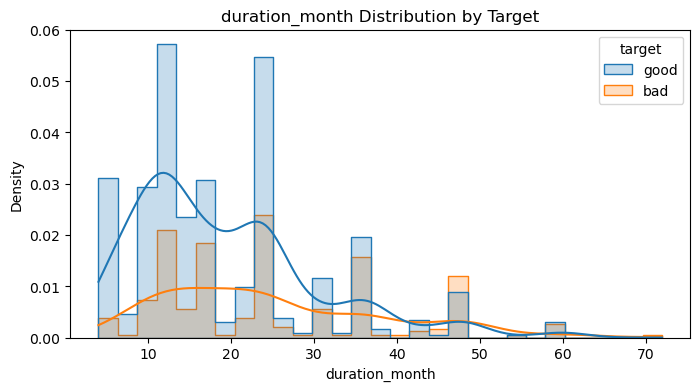

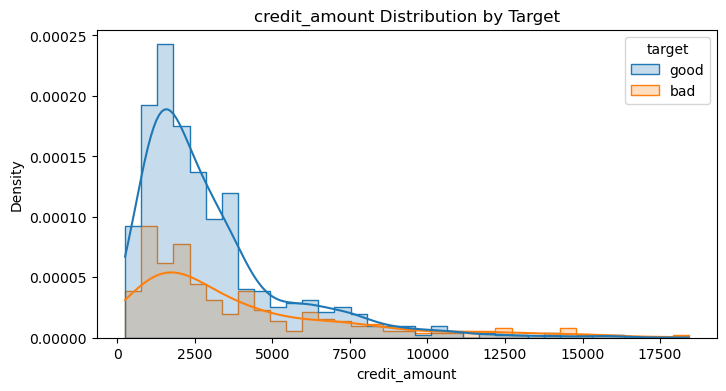

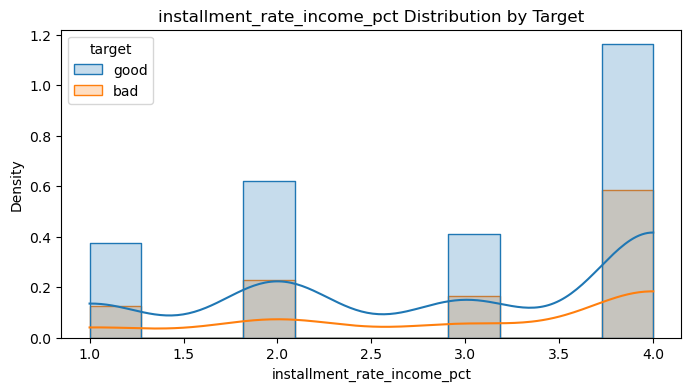

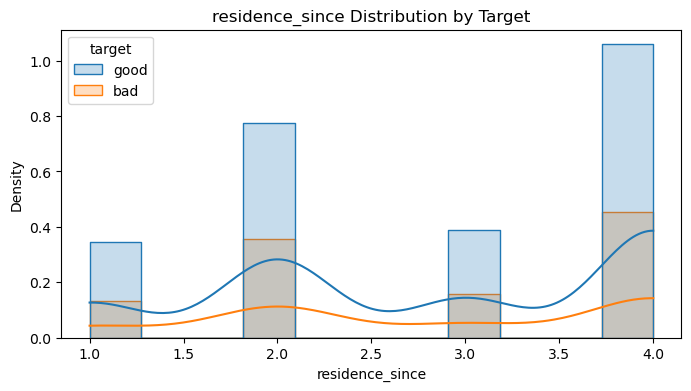

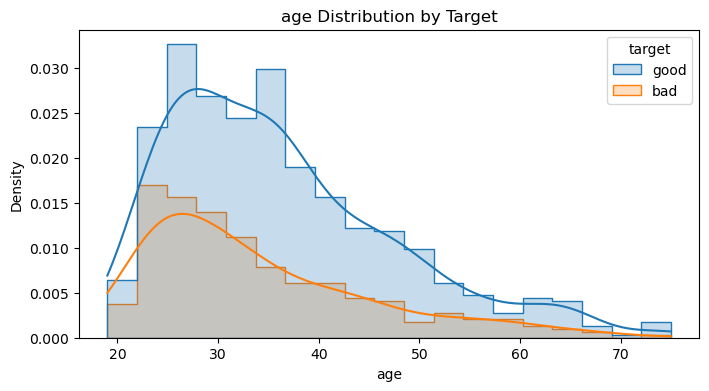

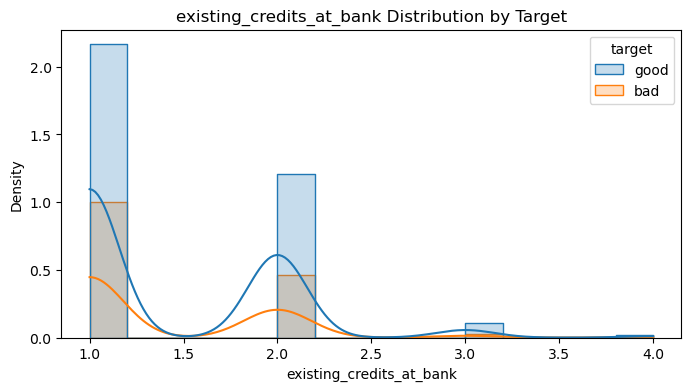

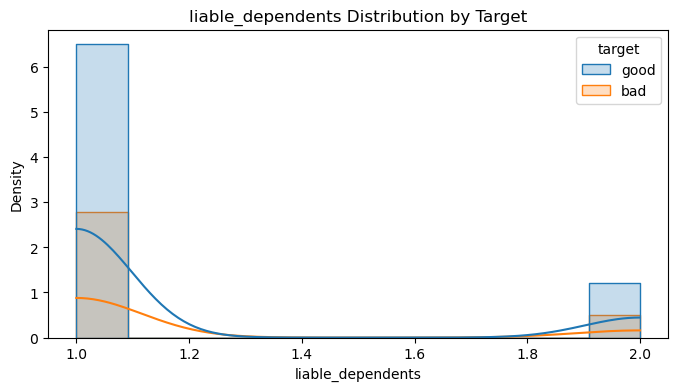

In [7]:
numerical_columns = [
    "duration_month",
    "credit_amount",
    "installment_rate_income_pct",
    "residence_since",
    "age",
    "existing_credits_at_bank",
    "liable_dependents"
]

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='target', kde=True, element='step', stat='density')
    plt.title(f'{col} Distribution by Target')
    plt.show()


For variables that have a very limited number of discrete values, which include "installment_rate_income_pct", "residence_since", "existing_credits_at_bank" and "liable_dependents", a standard histplot might not be the most effective visualization. Just like categorical variables, bar charts might be a better way to obtain useful insights.

Let's summarize the insights for duration_month, credit_amount, and age from their distribution density charts

Summary of Insights from German Credit Data Numerical Variables vs. Credit Risk (Target)

1. duration_month Distribution by Target

    Key Insight: The distribution of loan duration_month differs significantly between good and bad credit applicants.

    Good credit applicants tend to take loans with shorter durations, with prominent peaks around 12-15 months and another around 24 months. Bad credit applicants, on the other hand, show a flatter and more spread-out distribution, with a noticeable proportion taking longer duration loans (e.g., beyond 30 months, and even up to 48-60 months), where the density of bad credit applicants is relatively higher compared to good credit applicants at those longer durations. This suggests that longer loan durations are associated with higher credit risk.

2. credit_amount Distribution by Target

    Key Insight: The credit_amount also shows a distinct pattern between good and bad credit risks.

    Both groups have a right-skewed distribution, meaning most loans are for smaller amounts. Good credit applicants tend to take smaller credit amounts, with a much higher density concentrated at the lower end (e.g., < 2500 DM). Bad credit applicants are more prevalent at higher credit amounts. While their overall density is lower, the proportion of bad credit increases as the credit amount increases, especially for amounts above 5000 DM, indicating that larger loan amounts are associated with greater risk.

3. age Distribution by Target

    Key Insight: Age appears to be a factor in credit risk, with younger applicants showing higher risk.

    Good credit applicants have a broader age distribution, with a peak around 25-35 years old, and a significant presence across middle and older age groups. Bad credit applicants show a more concentrated distribution at younger ages, with a higher density for individuals in their early to late 20s. This suggests that younger individuals might be perceived as higher risk or have less financial stability.

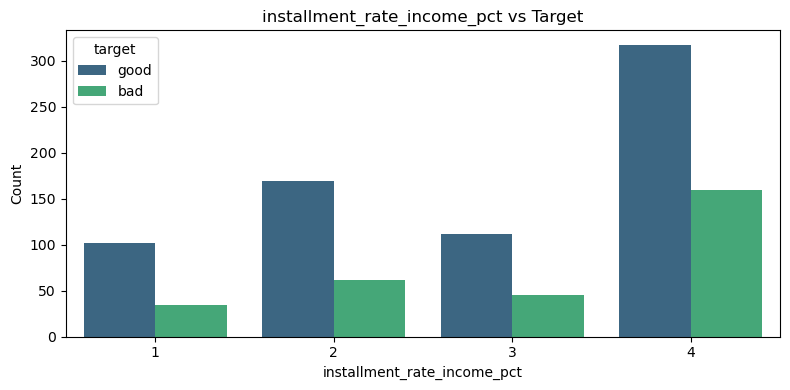

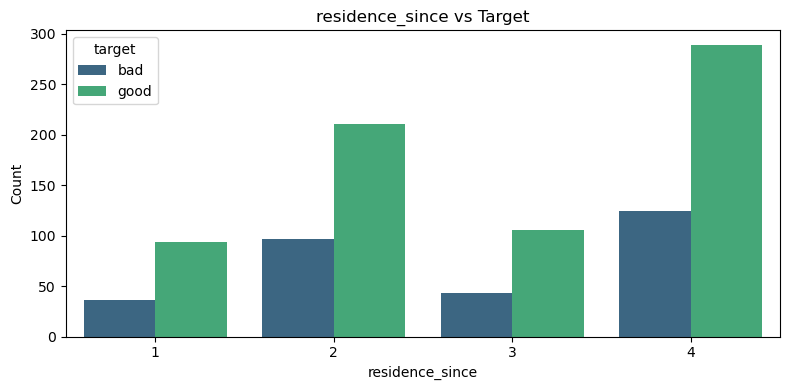

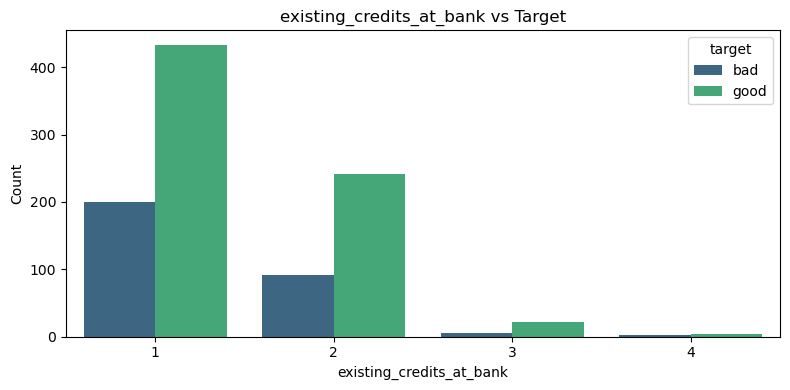

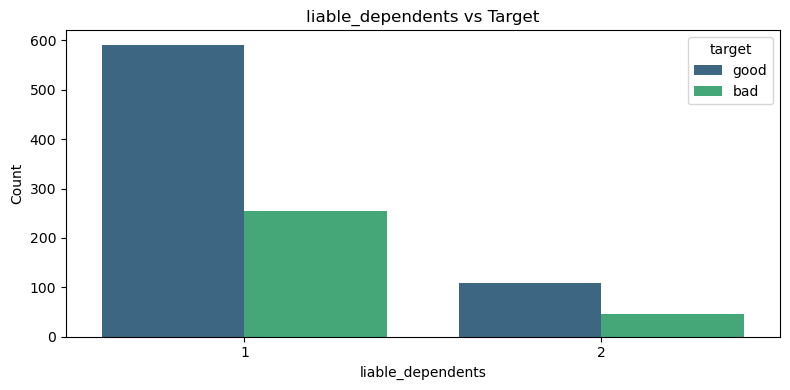

In [8]:
# List of numerical columns that are better visualized as discrete categories
discrete_numerical_columns = [
    "installment_rate_income_pct",
    "residence_since",
    "existing_credits_at_bank",
    "liable_dependents"
]

# Generate count plots for these columns, split by target
for col in discrete_numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='target', palette='viridis')
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Summary of Insights from German Credit Data Discrete Numerical Variables vs. Credit Risk (Target)

1. installment_rate_income_pct vs. Target

    Key Insight: This variable, representing the installment rate as a percentage of disposable income, shows a clear relationship with credit risk.

    For lower installment rates (1, 2), the number of good credit applicants outweighs the bad credit applicants.
    However, for higher installment rate (3, 4), while there's still a larger absolute number of good applicants, the proportion of bad credit applicants increases compared to the lower installment rates. This suggests that a higher commitment of income to installments is associated with an increased risk of being a bad credit customer.

2. residence_since vs. Target

    Key Insight: The duration of residence appears to be a non-factor on credit risk. As the residence_since value increases (indicating a longer period at the current residence), the proportion of good and bad credit applicants stay consistent.

3. existing_credits_at_bank vs. Target

    Key Insight: The vast majority of applicants have 1 or 2 existing credits. Since the sample size for applicants with 3 or 4 existing credits is so small, no valuable conclusion can be made here. This suggests that the number of existing credits at the bank may not be a major factor.

4. liable_dependents vs. Target

    Key Insight: This variable, which likely indicates the number of people the applicant is financially liable for, shows the overwhelming majority of applicants have 1 liable dependent, and within this group, the number of good credit applicants is substantially higher than bad credit applicants. The same can be said for applicants with 2 liable dependent, although the total count is much smaller. This suggests that the number of liable_dependents may be a non-factor on credit risk.

## Data Preprocessing

Before building a model, now I need to transform the data. I will enncode categorical variables, scale numerical feature, and ensure train/test split. Let's start with logistic regression and decision tree.

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Define columns by transformation type
ordinal_cols = ['checking_account_status', 'credit_history', 'savings_account', 'employment_since', 'job']
ordinal_categories = [
    ['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignment'],
    ['no credits taken/ all credits paid back duly', 'all credits at this bank paid back duly',
     'existing credits paid back duly till now', 'delay in paying off in the past',
     'critical account / other credits existing'],
    ['unknown / no savings account', '< 100 DM', '100 <= ... < 500 DM',
     '500 <= ... < 1000 DM', '>= 1000 DM'],
    ['unemployed', '< 1 year', '1 <= ... < 4 years', '4 <= ... < 7 years', '>= 7 years'],
    ['unemployed / unskilled non-resident', 'unskilled resident',
     'skilled employee / official', 'management / self-employed / highly qualified employee / officer']
]

onehot_cols = ['purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing']
binary_cols = ['telephone', 'foreign_worker']
numeric_cols = ['duration_month', 'credit_amount', 'installment_rate_income_pct', 'residence_since', 'age', 'existing_credits_at_bank', 'liable_dependents']

ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_cols),
        ('ohe', OneHotEncoder(drop='first'), onehot_cols),
        ('bin', OrdinalEncoder(), binary_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix


# Prepare data for splitting
X = df.drop(columns='target')
y = df['target'].map({'good': 0, 'bad': 1})  # Convert target to binary 0/1

# Data Preprocessing: Ensure train/test split (stratified because target is imbalanced).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

from sklearn.metrics import make_scorer

# Cost has to be weighted
def weighted_cost_scorer(y_true, y_pred):
    """
    Calculates the total cost based on the provided confusion matrix.
    Cost Matrix:
               Predicted
    Actual     Good (0)   Bad (1)
    --------------------------------
    Good (0)     0          1
    Bad (1)      5          0
    """
    cm = confusion_matrix(y_true, y_pred)
    # Ensure cm has expected shape (2,2)
    if cm.shape != (2, 2):
        print("Warning: Confusion matrix not 2x2. Check class presence in predictions.")
        # Return a high cost to penalize models with wrong format
        return 9999999

    # cm[0, 1] is False Positives (Actual Good (0), Predicted Bad (1))
    # cm[1, 0] is False Negatives (Actual Bad (1), Predicted Good (0))
    cost = (cm[0, 1] * 1) + (cm[1, 0] * 5)
    return cost

cost_scorer = make_scorer(weighted_cost_scorer, greater_is_better=False)


### Logistic Regression

In [11]:
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression with class_weight
pipeline_lr = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=123, solver='liblinear', class_weight={0: 1, 1: 5}) # {good: cost_fp, bad: cost_fn}
)

pipeline_lr.fit(X_train, y_train)

y_pred_lr = pipeline_lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=['good', 'bad']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

lr_weighted_cost = weighted_cost_scorer(y_test, y_pred_lr)
print(f"Weighted Cost: {lr_weighted_cost}")


Accuracy: 0.565

Classification Report:
               precision    recall  f1-score   support

        good       0.87      0.44      0.59       140
         bad       0.40      0.85      0.54        60

    accuracy                           0.56       200
   macro avg       0.63      0.65      0.56       200
weighted avg       0.73      0.56      0.57       200


Confusion Matrix:
 [[62 78]
 [ 9 51]]
Weighted Cost: 123


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier with class_weight
pipeline_dt = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=123, class_weight={0: 1, 1: 5}) # {good: cost_fp, bad: cost_fn}
)

pipeline_dt.fit(X_train, y_train)

y_pred_dt = pipeline_dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=['good', 'bad']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
dt_weighted_cost = weighted_cost_scorer(y_test, y_pred_dt)
print(f"Weighted Cost: {dt_weighted_cost}")

Accuracy: 0.675

Classification Report:
               precision    recall  f1-score   support

        good       0.76      0.79      0.77       140
         bad       0.45      0.42      0.43        60

    accuracy                           0.68       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.67      0.68      0.67       200


Confusion Matrix:
 [[110  30]
 [ 35  25]]
Weighted Cost: 205


Decision Tree has a higher accuracy than logistic regression, but also a higher weighted cost than logistic regression. This is due to the large amount of false negatives.

## Model Tuning & Comparison

Now that I have preprocessed the data and split training and test set, I could try more models.

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Random Forest Classifier with class_weight
pipeline_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=123, class_weight={0: 1, 1: 5}) # {good: cost_fp, bad: cost_fn}
)

# Define parameter grid for Random Forest
param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 300], # Number of trees
    'randomforestclassifier__max_depth': [4, 5, 6], # Max depth of trees
    'randomforestclassifier__min_samples_split': [2, 3, 4], # Min samples required to split a node
    'randomforestclassifier__min_samples_leaf': [2, 3, 4], # Min samples required at each leaf node
    'randomforestclassifier__max_features': ['sqrt', 'log2', 0.7] # The number of features to consider when looking for the best split
}

# Exhaustively searches over a specified parameter grid for the best combination of hyperparameters.
grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid=param_grid_rf,
    scoring=cost_scorer,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123),
    verbose=2,
    n_jobs=-1 # Use all available CPU cores
)

grid_search_rf.fit(X_train, y_train)

print("\nBest parameters for Random Forest:", grid_search_rf.best_params_)
print("Lowest Weighted Cost for Random Forest:", -grid_search_rf.best_score_)

# Evaluate the best Random Forest model on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=['good', 'bad']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
rf_weighted_cost = weighted_cost_scorer(y_test, y_pred_rf)
print(f"Weighted Cost (Best RF): {rf_weighted_cost}")


Fitting 10 folds for each of 243 candidates, totalling 2430 fits

Best parameters for Random Forest: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}
Lowest Weighted Cost for Random Forest: 40.8
Accuracy: 0.655

Classification Report:
               precision    recall  f1-score   support

        good       0.94      0.54      0.69       140
         bad       0.46      0.92      0.61        60

    accuracy                           0.66       200
   macro avg       0.70      0.73      0.65       200
weighted avg       0.80      0.66      0.67       200


Confusion Matrix:
 [[76 64]
 [ 5 55]]
Weighted Cost (Best RF): 89


### XGBoost

In [ ]:
from xgboost import XGBClassifier


# Let's calculate scale_pos_weight based on actual training data distribution
num_neg_train = np.sum(y_train == 0) # Count of 'good' (class 0) in training data
num_pos_train = np.sum(y_train == 1) # Count of 'bad' (class 1) in training data
# The ratio of the costs is 5 (cost_FN / cost_FP = 5/1 = 5)
scale_pos_weight_value = (num_neg_train / num_pos_train) * 5

# XGBoost with scale_pos_weight
pipeline_xgb = make_pipeline(
    preprocessor,
    XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss',
                  scale_pos_weight=scale_pos_weight_value)
)

# Define parameter grid for XGBoost
param_grid_xgb = {
    'xgbclassifier__n_estimators': [100, 200, 300], # Number of boosting trees
    'xgbclassifier__max_depth': [5, 6, 7],  # Max depth of each individual boosting tree.
    'xgbclassifier__learning_rate': [0.01, 0.02, 0.03], # Step size shrinkage used in boosting process.
    'xgbclassifier__subsample': [0.4, 0.5, 0.6], # Fraction of samples to be used for fitting the individual base learners.
    'xgbclassifier__colsample_bytree': [0.8, 0.9, 0.95] # Fraction of features to be used for fitting the individual base learners.
}

grid_search_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid=param_grid_xgb,
    scoring=cost_scorer,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=123),
    verbose=2,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

print("\nBest parameters for XGBoost:", grid_search_xgb.best_params_)
print("Lowest Weighted Cost for XGBoost:", -grid_search_xgb.best_score_)

# Evaluate the best XGBoost model on the test set
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=['good', 'bad']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
xgb_weighted_cost = weighted_cost_scorer(y_test, y_pred_xgb)
print(f"Weighted Cost (Best XGBoost): {xgb_weighted_cost}")

# Comparison of Models
print("\n--- Model Comparison (Weighted Cost on Test Set) ---")
print(f"Logistic Regression Weighted Cost: {lr_weighted_cost}")
print(f"Decision Tree Weighted Cost: {dt_weighted_cost}")
print(f"Random Forest Weighted Cost: {rf_weighted_cost}")
print(f"XGBoost Weighted Cost: {xgb_weighted_cost}")

Fitting 10 folds for each of 243 candidates, totalling 2430 fits

Best parameters for XGBoost: {'xgbclassifier__colsample_bytree': 0.95, 'xgbclassifier__learning_rate': 0.02, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 0.5}
Lowest Weighted Cost for XGBoost: 38.8
Accuracy: 0.655

Classification Report:
               precision    recall  f1-score   support

        good       0.90      0.57      0.70       140
         bad       0.46      0.85      0.60        60

    accuracy                           0.66       200
   macro avg       0.68      0.71      0.65       200
weighted avg       0.77      0.66      0.67       200


Confusion Matrix:
 [[80 60]
 [ 9 51]]
Weighted Cost (Best XGBoost): 105

--- Model Comparison (Weighted Cost on Test Set) ---
Logistic Regression Weighted Cost: 123
Decision Tree Weighted Cost: 205
Random Forest Weighted Cost: 89
XGBoost Weighted Cost: 105


c:\Users\Cheeson Lau\miniconda3\envs\german_credit\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:18:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Plotting ROC and Precision-Recall Curves

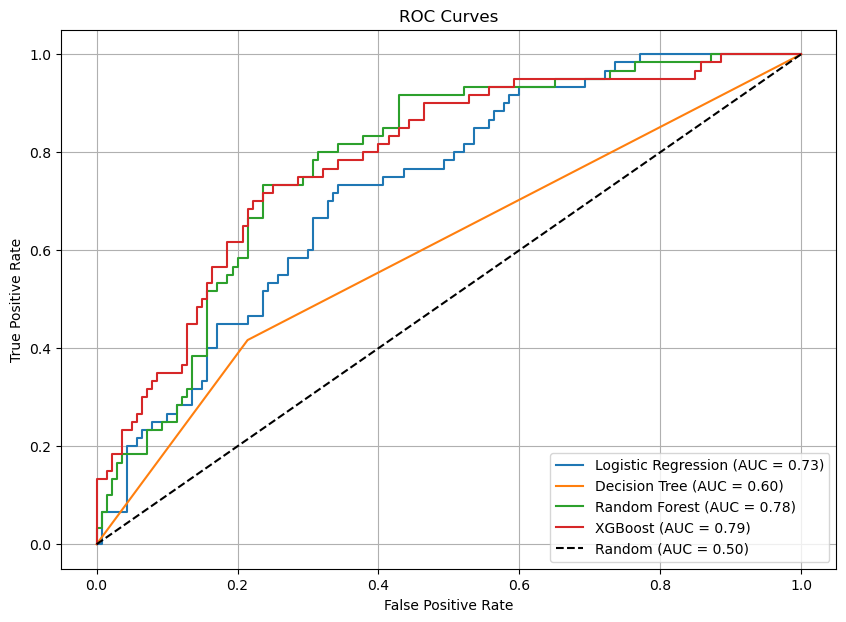

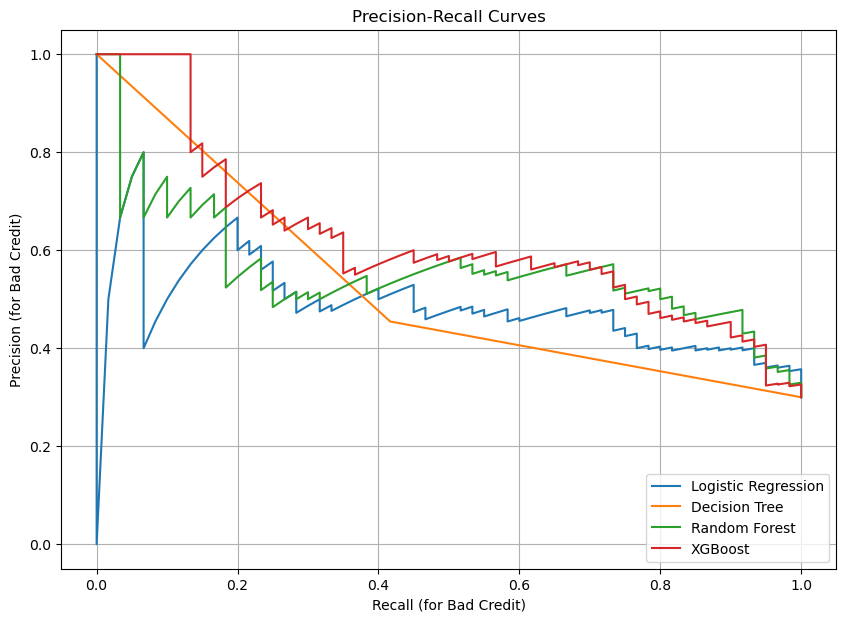

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc

# Get probabilities for ROC and Precision-Recall curves
y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]
y_proba_dt = pipeline_dt.predict_proba(X_test)[:, 1]
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Plot ROC Curves
plt.figure(figsize=(10, 7))
for name, y_proba in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
                         [y_proba_lr, y_proba_dt, y_proba_rf, y_proba_xgb]):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 7))
for name, y_proba in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
                         [y_proba_lr, y_proba_dt, y_proba_rf, y_proba_xgb]):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall (for Bad Credit)')
plt.ylabel('Precision (for Bad Credit)')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

For now, it seems random forest performs the best,  has XGBoost ever so slightly worse performance. A single decision tree performs the worst.

## Feature Importance

Not all variables are valuable in modelling. Let's filter out the variables that are not helpful to the model, in order to build a simplier one.

### Random Forest Feature Importance


Total transformed features: 35


C:\Users\Cheeson Lau\AppData\Local\Temp\ipykernel_23932\3990348796.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importances.head(20).values, y=rf_feature_importances.head(20).index, palette='viridis')


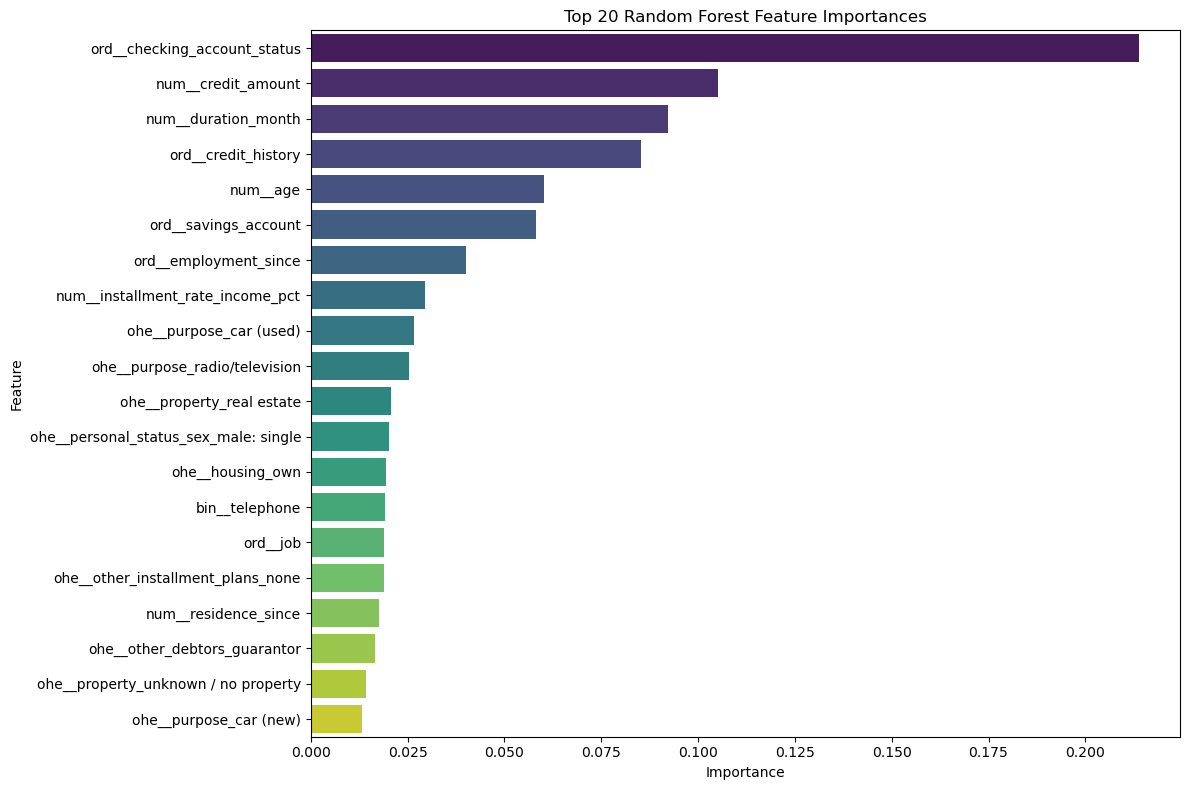

In [ ]:
# Get the fitted preprocessor from one of the pipelines
fitted_preprocessor = best_rf_model.named_steps['columntransformer']

# Get feature names after preprocessing
transformed_feature_names = fitted_preprocessor.get_feature_names_out(X.columns)

print(f"\nTotal transformed features: {len(transformed_feature_names)}")

rf_importances = best_rf_model.named_steps['randomforestclassifier'].feature_importances_

# Create a Series for easier handling and sorting
rf_feature_importances = pd.Series(rf_importances, index=transformed_feature_names)

# Sort features by importance
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_feature_importances.head(20).values, y=rf_feature_importances.head(20).index, palette='viridis')
plt.title('Top 20 Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Top 20 Random Forest Feature Importances

Overall Dominance: The top few features have significantly higher importance scores than the rest, indicating they are the primary drivers of credit risk prediction for the Random Forest model.

Top 3 Most Important Features:

ord_checking_account_status: This is by far the most important feature. This confirms my earlier EDA insight that the status of the checking account is a critical factor in determining credit risk.

num_credit_amount: The credit amount itself is also very important, again consistent with EDA showing larger amounts correlate with higher risk.

num_duration_month: The duration of the credit in months is the second most important. This aligns with my box plot analysis, which showed longer durations are associated with higher risk.

Other Important Features:

ord_credit_history: Credit history, as expected, is the fourth most important feature, reinforcing its strong predictive power.

ord_savings_account: The status of the savings account plays a significant role, aligns with the eariler EDA insight that higher savings in savings account are associated with lower risk.

num_age: Age is also a key factor, with younger ages generally being riskier.

Specific Categories from One-Hot Encoding:

ohe_purpose_car (used): This specific purpose category appears relatively high in importance, suggesting that loans for used cars carry a particular risk profile.

ohe_purpose_radio/television, ohe_property_real estate, ohe_housing_own, ohe_other_debtors_guarantor: Specific categories within purpose, property, housing, and other debtors also show up, indicating their individual impact on risk.

### XGBoost Feature Importance

C:\Users\Cheeson Lau\AppData\Local\Temp\ipykernel_23932\2375237194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_feature_importances.head(20).values, y=xgb_feature_importances.head(20).index, palette='viridis')


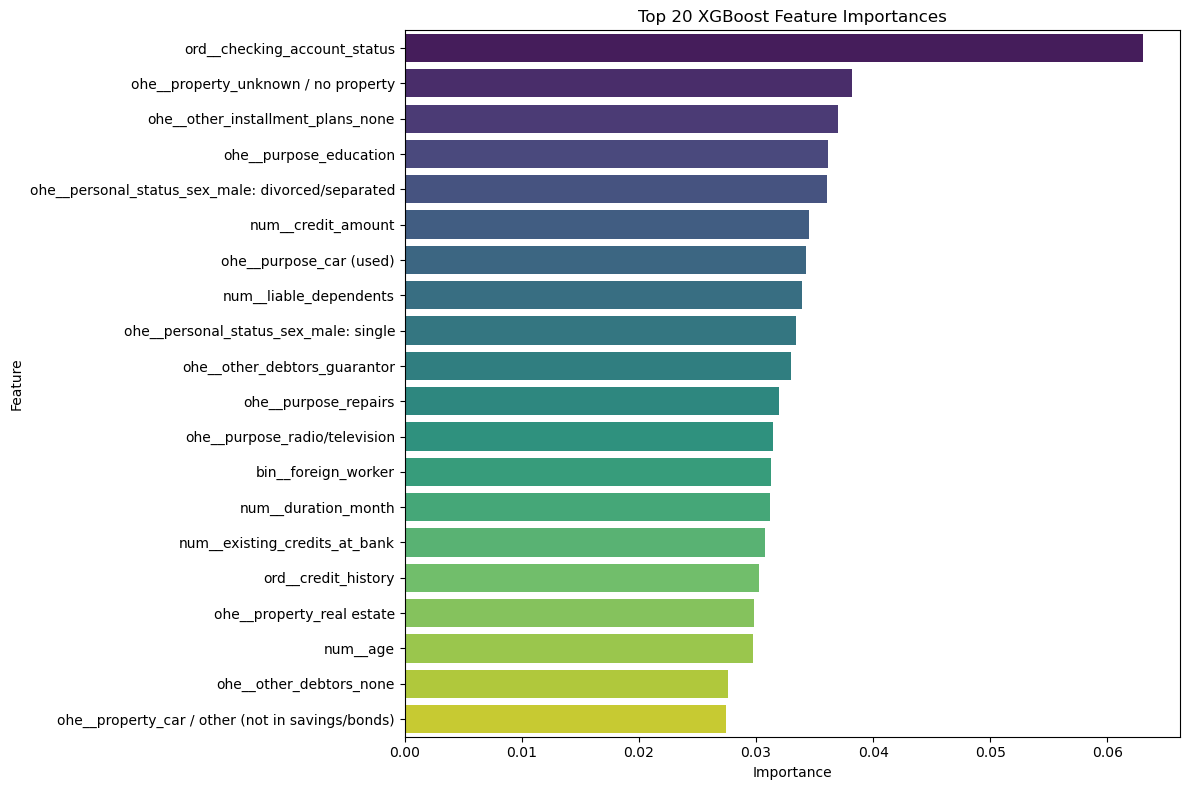

In [ ]:
xgb_importances = best_xgb_model.named_steps['xgbclassifier'].feature_importances_

# Create a Series for easier handling and sorting
xgb_feature_importances = pd.Series(xgb_importances, index=transformed_feature_names)

# Sort features by importance
xgb_feature_importances = xgb_feature_importances.sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=xgb_feature_importances.head(20).values, y=xgb_feature_importances.head(20).index, palette='viridis')
plt.title('Top 20 XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Top 20 XGBoost Feature Importances

Similar Top Features, Different Ordering/Magnitude: XGBoost also identifies many of the same top features as Random Forest, but their relative importance scores and exact order can differ.

Top 3 Most Important Features:

ord_checking_account_status: Again, this is the most important feature, confirming its critical role across different ensemble tree models.

ohe_other_installment_plans_none: This is a very interesting one, much higher here than in RF. It suggests that not having other installment plans is a strong indicator for XGBoost.

ohe_purpose_car (used): Just like what I have in random forest model.

Differences from Random Forest:

ohe_property_unknown / no property: Quite different from the Random Forest Model, it ranks way higher.

ohe_other_debtors_none: The absence of a guarantor is important for XGBoost.

num_duration_month: While still top 20 important, it's ranked a lot lower here than in Random Forest.

XGBoost seems to place higher importance on some of the one-hot encoded categorical features (e.g., ohe_other_installment_plans_none, ohe_other_debtors_none, ohe_property_unknown / no property, ohe_personal_status_sex_male : single) compared to Random Forest. Random Forest place higher importance on numerical and ordinal features.

The overall distribution of importance scores is also different, with XGBoost showing a slightly flatter distribution among its top features compared to the steeper drop-off in Random Forest.

## Feature Selection

MU current best model is Random Forest. There are some features in my Random Forest model that is probably not contributing much. Let's remove them to prevent overfitting and simplify the model.

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Define the Random Forest classifier that will be used inside SelectFromModel and the final pipeline
rf_base_estimator = RandomForestClassifier(
    random_state=42,
    class_weight={0: 1, 1: 5}
)

# Create the pipeline for GridSearchCV, now including SelectFromModel
pipeline_rf_fs = make_pipeline(
    preprocessor,
    SelectFromModel(estimator=rf_base_estimator, threshold='median', prefit=False),
    rf_base_estimator
)

# Define parameter grid for Random Forest
param_grid_rf_fs = {
    'selectfrommodel__threshold': ['0.75*median', '0.5*median'], # Experiment with thresholds
    'randomforestclassifier__n_estimators': [200, 300], # Number of trees
    'randomforestclassifier__max_depth': [6, 7, 8], # Max depth of trees
    'randomforestclassifier__min_samples_split': [2, 3], # Min samples required to split a node
    'randomforestclassifier__min_samples_leaf': [5, 6], # Min samples required at each leaf node
    'randomforestclassifier__max_features': ['sqrt', 'log2'] # The number of features to consider when looking for the best split
}

grid_search_rf_fs = GridSearchCV(
    pipeline_rf_fs,
    param_grid=param_grid_rf_fs,
    scoring=cost_scorer,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1 # Use all available CPU cores
)

grid_search_rf_fs.fit(X_train, y_train)

print("\nBest parameters for Random Forest with Feature Selection:", grid_search_rf_fs.best_params_)
print("Lowest Weighted Cost for Random Forest with Feature Selection:", -grid_search_rf_fs.best_score_)

# Evaluate the best Random Forest model with feature selection on the test set
best_rf_model_fs = grid_search_rf_fs.best_estimator_
y_pred_rf_fs = best_rf_model_fs.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_fs))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_fs, target_names=['good', 'bad']))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_fs))
rf_weighted_cost_fs = weighted_cost_scorer(y_test, y_pred_rf_fs)
print(f"Weighted Cost (Best RF with FS): {rf_weighted_cost_fs}")


Fitting 10 folds for each of 96 candidates, totalling 960 fits

Best parameters for Random Forest with Feature Selection: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200, 'selectfrommodel__threshold': '0.5*median'}
Lowest Weighted Cost for Random Forest with Feature Selection: 40.0
Accuracy: 0.645

Classification Report:
               precision    recall  f1-score   support

        good       0.94      0.53      0.68       140
         bad       0.45      0.92      0.61        60

    accuracy                           0.65       200
   macro avg       0.70      0.72      0.64       200
weighted avg       0.79      0.65      0.66       200


Confusion Matrix:
 [[74 66]
 [ 5 55]]
Weighted Cost (Best RF with FS): 91



--- Model Comparison (Weighted Cost on Test Set) ---
Logistic Regression Weighted Cost: 123
Decision Tree Weighted Cost: 205
Random Forest Weighted Cost: 89
XGBoost Weighted Cost: 105
Random Forest (with Feature Selection) Weighted Cost: 91


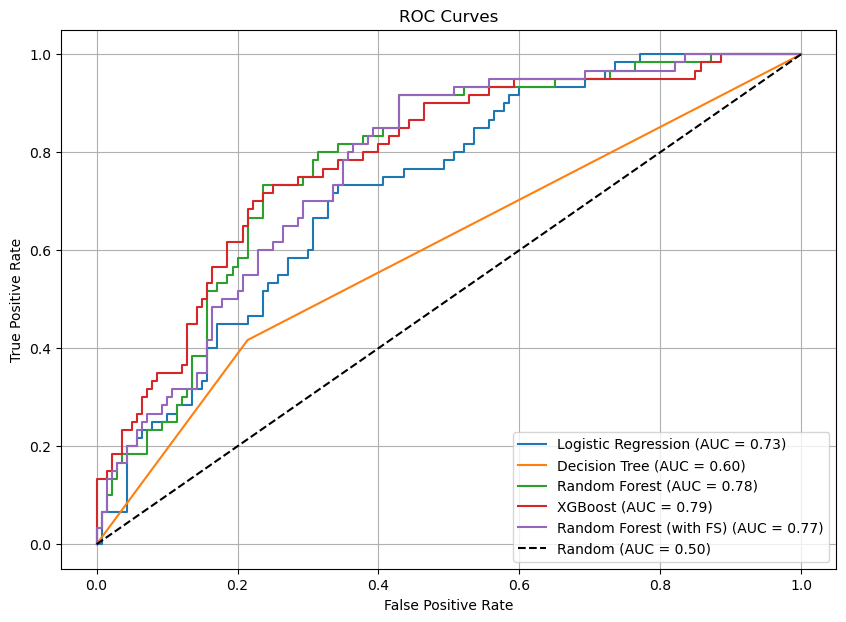

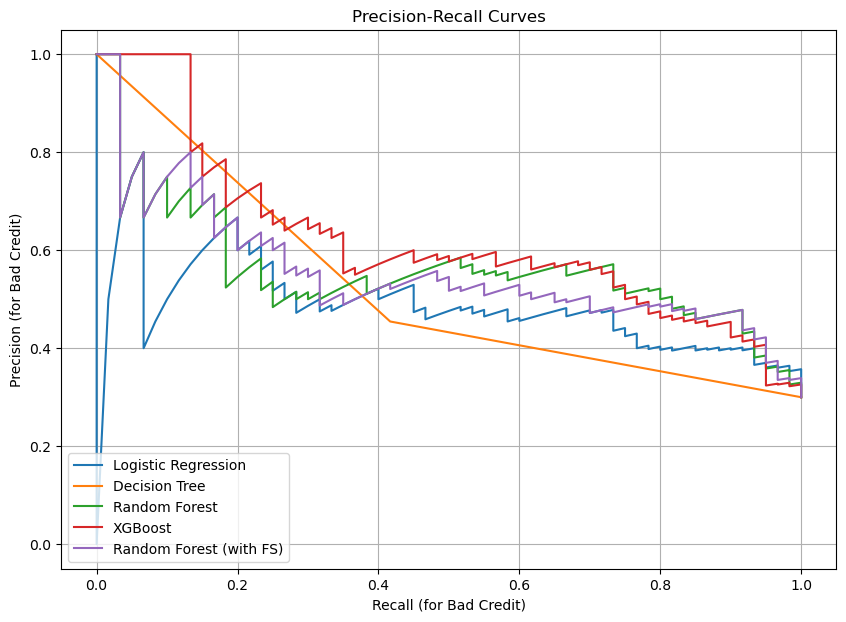


Number of features selected by SelectFromModel: 26


C:\Users\Cheeson Lau\AppData\Local\Temp\ipykernel_23932\707627894.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_fs_feature_importances.values, y=rf_fs_feature_importances.index, palette='viridis')


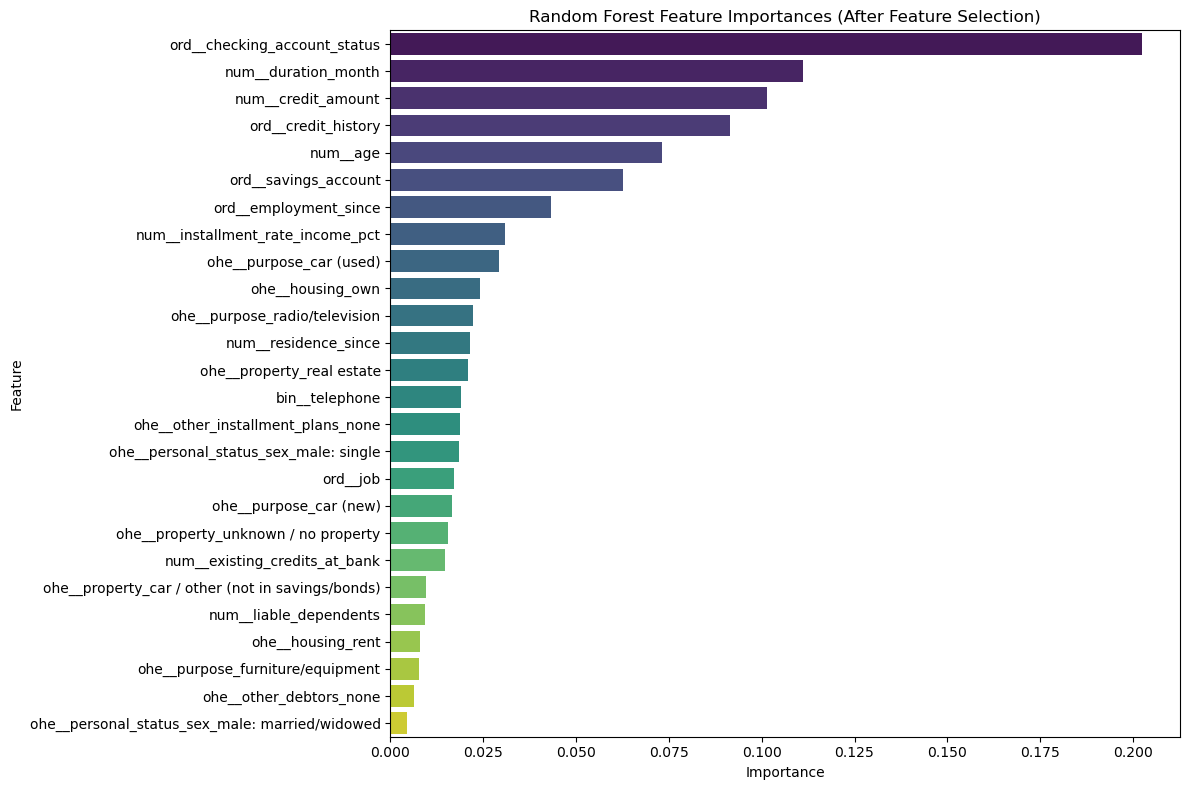

In [ ]:
# Comparison of Models
print("\n--- Model Comparison (Weighted Cost on Test Set) ---")
print(f"Logistic Regression Weighted Cost: {lr_weighted_cost}")
print(f"Decision Tree Weighted Cost: {dt_weighted_cost}")
print(f"Random Forest Weighted Cost: {rf_weighted_cost}")
print(f"XGBoost Weighted Cost: {xgb_weighted_cost}")
print(f"Random Forest (with Feature Selection) Weighted Cost: {rf_weighted_cost_fs}")


# Get probabilities for ROC and Precision-Recall curves
y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]
y_proba_dt = pipeline_dt.predict_proba(X_test)[:, 1]
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_proba_rf_fs = best_rf_model_fs.predict_proba(X_test)[:, 1]

# Plot ROC Curves
plt.figure(figsize=(10, 7))
for name, y_proba in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Random Forest (with FS)'],
                         [y_proba_lr, y_proba_dt, y_proba_rf, y_proba_xgb, y_proba_rf_fs]):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 7))
for name, y_proba in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Random Forest (with FS)'],
                         [y_proba_lr, y_proba_dt, y_proba_rf, y_proba_xgb, y_proba_rf_fs]):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall (for Bad Credit)')
plt.ylabel('Precision (for Bad Credit)')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Get the fitted preprocessor from the FS pipeline
fitted_preprocessor_fs = best_rf_model_fs.named_steps['columntransformer']
transformed_feature_names_fs = fitted_preprocessor_fs.get_feature_names_out(X.columns)

# Get the SelectFromModel step to see which features were selected
selector = best_rf_model_fs.named_steps['selectfrommodel']
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [transformed_feature_names_fs[i] for i in selected_feature_indices]

print(f"\nNumber of features selected by SelectFromModel: {len(selected_feature_names)}")

rf_fs_importances = best_rf_model_fs.named_steps['randomforestclassifier'].feature_importances_

# Create a Series for easier handling and sorting
rf_fs_feature_importances = pd.Series(rf_fs_importances, index=selected_feature_names)

# Sort features by importance
rf_fs_feature_importances = rf_fs_feature_importances.sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_fs_feature_importances.values, y=rf_fs_feature_importances.index, palette='viridis')
plt.title('Random Forest Feature Importances (After Feature Selection)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The weighted cost increases from 89 to 91, but the precision-recall curves show that my new random forest model with feature selection has a similar performance than my original random forest model.

9 features are removed. I think the fact that the model has 25% less features can make up the slight increase in weighted cost.

## Project Conclusion

This project aimed to build a machine learning model to predict credit risk (classifying applicants as 'good' or 'bad' credit risks) using the German Credit Dataset. A critical aspect of this problem was incorporating a custom cost matrix, where misclassifying a 'bad' customer as 'good' (False Negative) was significantly more costly (5 units) than misclassifying a 'good' customer as 'bad' (False Positive, 1 unit).
1. Data Preprocessing Summary

The raw data underwent comprehensive preprocessing to prepare it for machine learning models:

Target Mapping: The 'target' variable was mapped to numerical labels: 'good' credit as 0 and 'bad' credit as 1, aligning with standard machine learning conventions and cost-sensitive evaluation.

Categorical Feature Mapping: Original categorical codes were mapped to more descriptive string labels for better interpretability during EDA.

Feature Transformation: A ColumnTransformer was set up to handle different feature types:

Ordinal Encoding: Applied to features with a natural order (e.g., checking_account_status, credit_history, savings_account, employment_since, job).

One-Hot Encoding: Applied to nominal categorical features (e.g., purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing). drop='first' was used to prevent multicollinearity.

Standard Scaling: Applied to numerical features (e.g., duration_month, credit_amount, age) to normalize their scales, which is crucial for many machine learning algorithms.

Binary Encoding: Applied to binary features (telephone, foreign_worker).

Train/Test Split: The dataset was split into 80% training and 20% testing sets using StratifiedKFold to ensure the class distribution of 'good' and 'bad' credit applicants was maintained in both sets, addressing the inherent class imbalance.

2. Model Performance & Selection

A custom weighted_cost_scorer was defined to directly optimize for the business objective of minimizing the total cost from the confusion matrix. Various models were trained and tuned using GridSearchCV with 10-fold StratifiedKFold cross-validation, and class_weight (or scale_pos_weight for XGBoost) was applied to make them cost-sensitive.

The final weighted costs on the test set were:

Logistic Regression Weighted Cost: 123

Decision Tree Weighted Cost: 205

Random Forest (Original) Weighted Cost: 89

XGBoost Weighted Cost: 105

Random Forest (with Feature Selection) Weighted Cost: 91

Model Selection:
Based on these results, the Random Forest (Original) model achieved the lowest weighted cost of 89 on the test set. However, the Random Forest with Feature Selection (cost 91) was very close and offered a simpler model. Thr original Random Forest only slightly edged it out in terms of cost minimization.

Visual Performance (ROC & Precision-Recall Curves):

ROC Curves: The Random Forest (Original) and XGBoost models showed the highest AUC scores (0.78 and 0.79 respectively), indicating excellent overall discriminative power. The Random Forest (with FS) also performed very well with an AUC of 0.77.

Precision-Recall Curves: The Random Forest (Original) and XGBoost curves generally stayed higher on the precision axis for given recall levels, demonstrating their ability to balance identifying 'bad' customers (high recall) while minimizing false alarms (good precision). The Random Forest (with FS) curve was also very competitive, especially when recall for bad credit is high.

3. Key Feature Insights (from Random Forest Feature Importances)

The feature importance analysis for the Random Forest (with FS) model provides crucial understanding into what drives credit risk:

Dominant Factors:

ord_checking_account_status: This feature is overwhelmingly the most important predictor. The status of an applicant's checking account (e.g., having no account, a low balance, or a high balance/salary assignment) is the single strongest indicator of credit risk.

num_duration_month: The duration for which the credit is taken is the second most influential factor, indicating that longer loan terms are associated with higher risk.

num_credit_amount: The amount of credit requested also plays a very significant role, with larger amounts generally correlating with higher risk.

ord_credit_history: An applicant's past credit behavior is, as expected, a fundamental determinant of future risk.

num_age: The age of the applicant is also a key factor, with younger applicants often presenting higher risk.

ord_savings_account: The presence and balance of a savings account contribute significantly to risk assessment.

Important Categorical Nuances:

Specific categories within features like ohe_purpose_car (used), ohe_housing_own, and ohe_purpose_radio/television show notable importance, suggesting that the specific reason for the loan or housing situation can influence risk.

4. Overall Conclusion & Recommendations

This project successfully developed a robust credit risk prediction model. The Random Forest model stands out as the best performer, achieving the lowest weighted cost of 89, demonstrating its effectiveness in minimizing the more critical False Negative errors. While feature selection slightly increased the cost in this specific iteration, the analysis provided valuable insights into which features are truly driving the model's predictions.

For a real-world application, the interpretability gained from feature importances is invaluable. Financial institutions can use these insights to:

Focus on Key Data Points: Prioritize data collection and verification for features like checking account status, loan duration, credit amount, credit history, and age.

Refine Credit Policies: Adjust policies based on the risk profiles associated with specific loan purposes (e.g., used cars, radio/television) or other financial commitments.

Explain Decisions: Provide transparent explanations to applicants regarding the factors influencing their credit decisions.

This project serves as a strong foundation for a credit risk assessment system, balancing predictive performance with crucial business considerations.